In [9]:
import keras
import numpy as np
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
word_index = reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

In [20]:
train_x=np.zeros([train_data.shape[0],10000],dtype=float)
test_x=np.zeros([test_data.shape[0],10000],dtype=float)
train_y=np.zeros([train_data.shape[0],46],dtype=float)
test_y=np.zeros([test_data.shape[0],46],dtype=float)

def vectorize_sequences(data ,sequences):
    for i,sequence in enumerate(sequences):
        data[i,sequence]=1.
    return data

train_x=vectorize_sequences(train_x , train_data)
train_y=vectorize_sequences(train_y, train_labels)
test_x=vectorize_sequences(test_x , test_data)
test_y=vectorize_sequences(test_y ,test_labels )


In [23]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#第一層: (10000+1)*64 parameters
#第二層: (64+1)*64 parameters
#第三層: (64+1)*46 parameters
model.summary()   

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
x_val = train_x[:1000]
partial_x_train = train_x[1000:]

y_val = train_y[:1000]
partial_y_train =train_y[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 49ms/step - loss: 2.5970 - accuracy: 0.5071 - val_loss: 1.7226 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 1s 33ms/step - loss: 1.4155 - accuracy: 0.6969 - val_loss: 1.3061 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0477 - accuracy: 0.7734 - val_loss: 1.1566 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 1s 37ms/step - loss: 0.8184 - accuracy: 0.8236 - val_loss: 1.0346 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 36ms/step - loss: 0.6402 - accuracy: 0.8628 - val_loss: 0.9505 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 1s 37ms/step - loss: 0.5075 - accuracy: 0.8919 - val_loss: 0.9200 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4018 - accuracy: 0.9152 - val_loss: 0.8879 - val_accuracy: 0.8130
Epoch 8/20
16

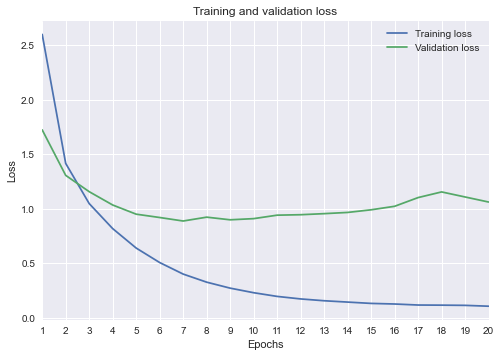

In [28]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
history_dict = history.history

def plot_Training_validation_loss(history_dict,title):
    epoch=np.arange(1,len(history_dict['loss'])+1)
    plt.plot(epoch, history_dict['loss'], '-', label='Training loss')
    plt.plot(epoch, history_dict['val_loss'], '-', label='Validation loss')
    plt.title(title)
    plt.xlabel('Epochs')
    x_major_locator=plt.MultipleLocator(1)
    plt.gca().xaxis.set_major_locator(x_major_locator)
    plt.xlim(1,len(epoch))
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

#大概epoch=7以後就有overfitting的問題
plot_Training_validation_loss(history_dict,'Training and validation loss')

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=7,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(test_x, test_y)

Epoch 1/7
16/16 [==============================] - 1s 47ms/step - loss: 2.7485 - accuracy: 0.5051 - val_loss: 1.7851 - val_accuracy: 0.6470
Epoch 2/7
16/16 [==============================] - 1s 35ms/step - loss: 1.4346 - accuracy: 0.7060 - val_loss: 1.2973 - val_accuracy: 0.7070
Epoch 3/7
16/16 [==============================] - 1s 43ms/step - loss: 1.0469 - accuracy: 0.7762 - val_loss: 1.1348 - val_accuracy: 0.7510
Epoch 4/7
16/16 [==============================] - 1s 38ms/step - loss: 0.8256 - accuracy: 0.8262 - val_loss: 1.0232 - val_accuracy: 0.7880
Epoch 5/7
16/16 [==============================] - 1s 37ms/step - loss: 0.6616 - accuracy: 0.8582 - val_loss: 0.9572 - val_accuracy: 0.8060
Epoch 6/7
16/16 [==============================] - 1s 38ms/step - loss: 0.5301 - accuracy: 0.8903 - val_loss: 0.9187 - val_accuracy: 0.8140
Epoch 7/7
71/71 [==============================] - 0s 3ms/step - loss: 1.0220 - accuracy: 0.7711


In [34]:
model.predict(test_x)
np.sum(model.predict(test_x),axis=1)

array([0.99999964, 0.99999994, 0.9999999 , ..., 0.99999964, 0.9999998 ,
       1.        ], dtype=float32)